## Unsupervised ML Python Homework

In [254]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import factor_analyzer
from factor_analyzer import FactorAnalyzer

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [272]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
dtypes: float64(20)
memory usage: 156.4 KB


### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [274]:
data.shape

(1000, 20)

In [279]:
from sklearn.decomposition import PCA
pca_85 = PCA(0.85)
pca_85.fit(data)
x_train_pca_85 = pca_85.transform(data)

In [280]:
pca_85.n_components_

14

Hanya tersisa: 14 feature columns setelah dlakukan PCA. Ternyata, untuk mencapai 85% explained variance, hanya dibutuhkan 14 kolom. Padahal, sebelumnya, data kita awalnya memiliki lebih dari 20 kolom!

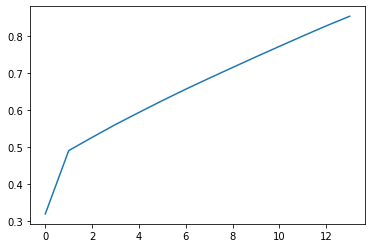

In [282]:
# visualisasi dari pca 85
plt.plot(np.cumsum(pca_85.explained_variance_ratio_))
plt.show()

In [284]:
x_train_pca_85

array([[  4.48923944,  23.38882165,  -1.24532729, ...,   1.17611271,
          3.16278081,   9.61650588],
       [-16.92757929, -21.7200057 ,   0.45323566, ...,   4.2437332 ,
         -7.04060079,   2.1188578 ],
       [ 29.58543855,  -0.36706455,   8.00933071, ...,  -8.35669067,
         -7.11062115,   2.4574361 ],
       ...,
       [ 23.5152475 ,   2.27117471,   5.06803993, ...,  -5.32223406,
         17.37544206,  12.75136281],
       [ 32.73031492,  -4.06932209,  10.02554988, ...,   2.83465778,
          0.47882131,  -5.39759754],
       [-16.00692247,  16.37007392,  -6.46781205, ...,   0.74180138,
          1.81046739,  -4.90428894]])

In [286]:
x_train_pca_85

array([[  4.48923944,  23.38882165,  -1.24532729, ...,   1.17611271,
          3.16278081,   9.61650588],
       [-16.92757929, -21.7200057 ,   0.45323566, ...,   4.2437332 ,
         -7.04060079,   2.1188578 ],
       [ 29.58543855,  -0.36706455,   8.00933071, ...,  -8.35669067,
         -7.11062115,   2.4574361 ],
       ...,
       [ 23.5152475 ,   2.27117471,   5.06803993, ...,  -5.32223406,
         17.37544206,  12.75136281],
       [ 32.73031492,  -4.06932209,  10.02554988, ...,   2.83465778,
          0.47882131,  -5.39759754],
       [-16.00692247,  16.37007392,  -6.46781205, ...,   0.74180138,
          1.81046739,  -4.90428894]])

In [289]:
x_train_pca_85.shape

(1000, 14)

##### Jawab: Hasil PCA adalah mengambil 14 Principal Components.

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [290]:
df_pca = pd.DataFrame(x_train_pca_85)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4.489239,23.388822,-1.245327,-0.604663,7.168715,12.140433,-2.606712,-2.982270,-1.240097,0.661235,3.653253,1.176113,3.162781,9.616506
1,-16.927579,-21.720006,0.453236,-2.092276,-1.854185,8.105598,0.857659,2.890713,0.310611,-0.045326,-4.492495,4.243733,-7.040601,2.118858
2,29.585439,-0.367065,8.009331,3.564103,3.851260,1.446380,8.451138,-9.789632,-3.855225,-1.684923,-3.405300,-8.356691,-7.110621,2.457436
3,-18.107060,-8.676266,-0.009083,9.928400,2.647460,-2.341457,4.218565,1.104390,-2.239445,-1.504301,3.573772,-18.724099,1.837367,0.536196
4,-19.133698,-13.345589,-5.568956,-6.848398,-5.305273,-10.130572,-9.445192,0.368672,-7.123532,-2.462980,2.651811,-6.460466,4.975422,4.145147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-27.596745,-5.675153,1.037456,2.060439,12.357932,-1.168417,-5.429511,-7.116851,2.629224,-3.142956,2.621997,-0.400097,0.836853,-1.590214
996,-25.101230,-16.880265,-2.327276,0.339001,-0.856307,7.415144,3.238225,4.557121,-0.463356,-7.809110,3.039680,6.374570,-3.569220,-3.465001
997,23.515248,2.271175,5.068040,1.014359,12.138911,0.638384,-5.087893,-0.279657,1.870682,1.883865,-1.320213,-5.322234,17.375442,12.751363
998,32.730315,-4.069322,10.025550,0.286854,-16.406983,-5.374449,9.337272,5.613491,-0.188005,-8.060883,3.080424,2.834658,0.478821,-5.397598


In [291]:
# Elbow Method
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(df_pca)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

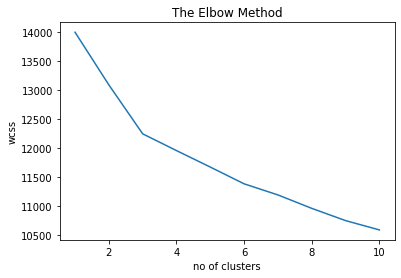

In [292]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

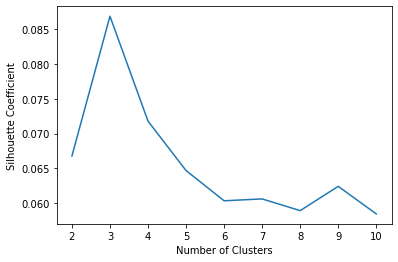

In [293]:
# Silhouette score

silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(df_pca)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

'Elbow' dan nilai Silhoutter terjadi di k = 3  
Berarti, kita bisa berasumsi bahwa k = 3 menjadi 'k' yang paling ideal dalam k-Means ini.
##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah k = 3